In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

In [16]:
df = pd.read_csv("/content/pbp-2021 (1).csv")


In [17]:
df.columns

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10',
       'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin',
       'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation',
       'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
       'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
       'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble',
       'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
       'RushDirection', 'YardLineFixed', 'YardLineDirection',
       'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType',
       'PenaltyYards'],
      dtype='object')

In [18]:
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2021092612,2021-09-26,1,9,10,MIN,SEA,1,10,57,...,0,0,NaN,43,OPP,0,NaN,0,NaN,0
1,2021092612,2021-09-26,1,8,32,MIN,SEA,1,10,74,...,0,0,NaN,26,OPP,0,NaN,0,NaN,0
2,2021092612,2021-09-26,1,7,52,MIN,SEA,2,2,82,...,0,0,NaN,18,OPP,0,NaN,0,NaN,0
3,2021092612,2021-09-26,1,7,13,MIN,SEA,1,8,92,...,0,0,CENTER,8,OPP,0,NaN,0,NaN,0
4,2021101008,2021-10-10,1,9,50,WAS,NO,2,2,51,...,0,0,LEFT TACKLE,49,OPP,0,NaN,0,NaN,0


In [19]:
df[["OffenseTeam", "Yards"]]

,OffenseTeam,Yards
0,MIN,17
1,MIN,8
2,MIN,10
3,MIN,1
4,WAS,3
...,...,...
42790,BUF,2
42791,BUF,5
42792,BUF,1
42793,BUF,0


Questions to Answer 
- Most yards per play by Team
- Most yards given up by Team


In [20]:
ypp = df.groupby("OffenseTeam")['Yards'].mean()
ypp.sort_values(ascending = False)

OffenseTeam
LAC    5.027027
CIN    4.973576
LA     4.945923
SF     4.944162
TB     4.941358
DAL    4.880882
KC     4.872175
LV     4.827080
PHI    4.797375
BUF    4.789969
ARI    4.771791
NE     4.727273
CLE    4.705380
GB     4.688388
MIN    4.658897
BAL    4.554299
IND    4.497989
DEN    4.445385
NYJ    4.366125
WAS    4.304132
SEA    4.300551
CHI    4.290956
TEN    4.282710
ATL    4.208981
JAX    4.196398
DET    4.122807
NO     4.096747
NYG    4.077246
CAR    4.077110
PIT    4.076490
MIA    4.019124
HOU    3.825823
Name: Yards, dtype: float64

In [21]:
dypp = df.groupby("DefenseTeam")['Yards'].mean()
dypp.sort_values()

DefenseTeam
CAR    3.910288
BUF    4.076792
TB     4.197411
LV     4.210863
LA     4.286634
SF     4.304422
PHI    4.308072
CHI    4.310228
NO     4.333603
MIA    4.372977
CLE    4.382427
TEN    4.382450
JAX    4.450000
NE     4.468804
ARI    4.477331
PIT    4.522551
CIN    4.552589
SEA    4.560685
LAC    4.576395
NYG    4.591549
GB     4.624462
DEN    4.656690
MIN    4.668740
ATL    4.691083
BAL    4.733891
IND    4.750000
DET    4.761866
NYJ    4.816988
WAS    4.831967
KC     4.844987
DAL    4.864228
HOU    4.932692
Name: Yards, dtype: float64

In [22]:
odypp = pd.concat([ypp,dypp],axis=1,join='inner')
odypp.columns = ['OfYPP','DeYPP']
odypp

,OfYPP,DeYPP
ARI,4.771791,4.477331
ATL,4.208981,4.691083
BAL,4.554299,4.733891
BUF,4.789969,4.076792
CAR,4.077110,3.910288
CHI,4.290956,4.310228
CIN,4.973576,4.552589
CLE,4.705380,4.382427
DAL,4.880882,4.864228
DEN,4.445385,4.656690


In [29]:
odypp.rename(columns = {'index':'Team'}, inplace = True)
odypp = odypp.drop('level_0', 1)

odypp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Team,OfYPP,DeYPP
0,ARI,4.771791,4.477331
1,ATL,4.208981,4.691083
2,BAL,4.554299,4.733891
3,BUF,4.789969,4.076792
4,CAR,4.077110,3.910288
5,CHI,4.290956,4.310228
6,CIN,4.973576,4.552589
7,CLE,4.705380,4.382427
8,DAL,4.880882,4.864228
9,DEN,4.445385,4.656690


Scatter on Off yards per play x Def Yards per play
better teams should be farther right & low 

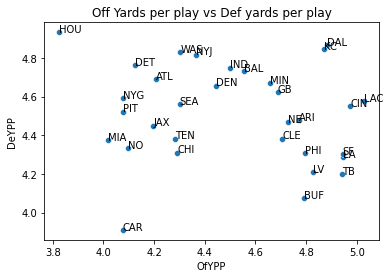

In [30]:
sns.scatterplot(data=odypp, x='OfYPP',y='DeYPP')

plt.title("Off Yards per play vs Def yards per play")

for i in range(odypp.shape[0]):
  plt.text(x=odypp.OfYPP[i],y=odypp.DeYPP[i],s=odypp.Team[i])


In [35]:
odypp['Yards_dif'] = odypp['OfYPP'] - odypp['DeYPP']
odypp

,Team,OfYPP,DeYPP,Yards_dif
0,ARI,4.771791,4.477331,0.294460
1,ATL,4.208981,4.691083,-0.482102
2,BAL,4.554299,4.733891,-0.179593
3,BUF,4.789969,4.076792,0.713177
4,CAR,4.077110,3.910288,0.166822
5,CHI,4.290956,4.310228,-0.019273
6,CIN,4.973576,4.552589,0.420987
7,CLE,4.705380,4.382427,0.322953
8,DAL,4.880882,4.864228,0.016655
9,DEN,4.445385,4.656690,-0.211305


In [43]:
Wins = [11,7,8,11,5,6,10,8,12,7,3,13,4,9,3,12,12,9,10,9,8,10,9,4,4,9,9,7,10,13,12,7]
odypp['Wins'] = Wins
odypp

,Team,OfYPP,DeYPP,Yards_dif,Wins
0,ARI,4.771791,4.477331,0.294460,11
1,ATL,4.208981,4.691083,-0.482102,7
2,BAL,4.554299,4.733891,-0.179593,8
3,BUF,4.789969,4.076792,0.713177,11
4,CAR,4.077110,3.910288,0.166822,5
5,CHI,4.290956,4.310228,-0.019273,6
6,CIN,4.973576,4.552589,0.420987,10
7,CLE,4.705380,4.382427,0.322953,8
8,DAL,4.880882,4.864228,0.016655,12
9,DEN,4.445385,4.656690,-0.211305,7


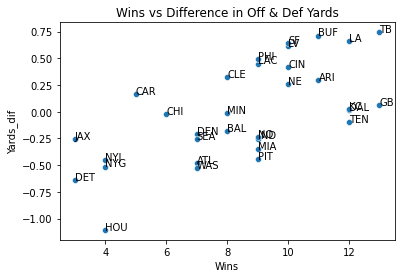

In [45]:
sns.scatterplot(data=odypp, x='Wins',y='Yards_dif')

plt.title("Wins vs Difference in Off & Def Yards")

for i in range(odypp.shape[0]):
  plt.text(x=odypp.Wins[i],y=odypp.Yards_dif[i],s=odypp.Team[i])

Some outliers with Teams like GB, Ten, Dal, KC with very minimal yards dif. 
Garbage Time yards when up big in game? Next project